# Data Analysis Notebook

## Activity 2.1: Descriptive Statistics
Deliverables:
- Comprehensive exploratory data analysis  
- Central tendency and dispersion measures calculation  
- Outlier detection and pattern identification  
- Distribution analysis of key variables  
- Data quality assessment report  

Key Metrics to Analyze:
- User engagement distribution  
- Content popularity trends  
- Viewing completion rates  
- Device usage patterns  
- Geographic viewing preferences  

In [3]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#from sqlalchemy import create_engine


### Loading datasets

In [4]:
# Load datasets
users = pd.read_csv('data/portfolio/users.csv')
sessions = pd.read_csv('data/portfolio/viewing_sessions.csv')

### Exploratory Data Analysis (EDA)

In [6]:
# Dataset overview
print(users.info())
print(users.describe(include='all'))
print(sessions.info())
print(sessions.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   country                 5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   registration_date       5000 non-null   object 
 5   total_watch_time_hours  5000 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 234.5+ KB
None
       user_id          age country subscription_type registration_date  \
count     5000  5000.000000    5000              5000              5000   
unique    5000          NaN       5                 3               785   
top      U5000          NaN  Mexico             Basic        2024-01-24   
freq         1          NaN    1514              2003                15   
mean       NaN    41.59100

### Central tendency and dispersion

In [7]:
# Distribution of watch time per user
users['total_watch_time_hours'].describe()

count    5000.000000
mean      335.041380
std       220.023813
min         9.800000
25%       163.900000
50%       312.350000
75%       455.400000
max      1093.100000
Name: total_watch_time_hours, dtype: float64

### Outlier detection (IQR + Z-score)

In [8]:
# IQR method
Q1 = users['total_watch_time_hours'].quantile(0.25)
Q3 = users['total_watch_time_hours'].quantile(0.75)
IQR = Q3 - Q1
outliers = users[(users['total_watch_time_hours'] < Q1 - 1.5*IQR) | 
                (users['total_watch_time_hours'] > Q3 + 1.5*IQR)]
outliers

,user_id,age,country,subscription_type,registration_date,total_watch_time_hours
116,U0117,22,Mexico,Premium,2023-10-13,1034.7
157,U0158,22,Colombia,Premium,2022-04-23,1018.9
272,U0273,18,Colombia,Premium,2022-12-23,1041.9
286,U0287,22,Mexico,Premium,2023-03-09,903.9
306,U0307,47,Colombia,Premium,2022-04-11,908.3
...,...,...,...,...,...,...
4678,U4679,39,Colombia,Premium,2022-06-28,931.7
4751,U4752,27,Argentina,Premium,2022-04-17,908.8
4775,U4776,42,Mexico,Premium,2023-03-09,970.4
4807,U4808,20,Argentina,Premium,2022-11-28,1043.3


### Distribution analysis of key variables

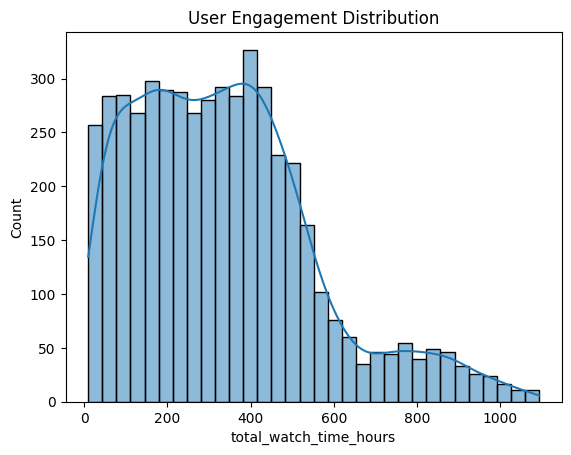

In [9]:
sns.histplot(users['total_watch_time_hours'], kde=True)
plt.title('User Engagement Distribution')
plt.show()

### Data quality assessment

In [10]:
print('Missing values in Users:')
print(users.isnull().sum())
print('Missing values in Sessions:')
print(sessions.isnull().sum())

print('Duplicates in Users:', users.duplicated().sum())
print('Duplicates in Sessions:', sessions.duplicated().sum())

Missing values in Users:
user_id                   0
age                       0
country                   0
subscription_type         0
registration_date         0
total_watch_time_hours    0
dtype: int64
Missing values in Sessions:
session_id                0
user_id                   0
content_id                0
watch_date                0
watch_duration_minutes    0
completion_percentage     0
device_type               0
quality_level             0
dtype: int64
Duplicates in Users: 0
Duplicates in Sessions: 0


---
## Activity 2.2: Inferential Analysis
Deliverables:
- Hypothesis testing on user behavior patterns  
- Correlation analysis between variables  
- User segmentation using clustering algorithms  
- Basic predictive modeling for user retention  
- Statistical significance testing and interpretation  

Required Analyses:
- Hypothesis Testing: Premium vs Basic user engagement  
- Correlation Analysis: Age, viewing time, and completion rates  
- Clustering: User behavior segmentation (K-means, hierarchical)  
- Regression: Predict user retention based on viewing patterns  
- Time Series: Seasonal viewing trends analysis  

### Hypothesis Testing: Premium vs Basic user engagement

In [11]:
premium = users[users['subscription_type']=='Premium']['total_watch_time_hours']
basic = users[users['subscription_type']=='Basic']['total_watch_time_hours']
stats.ttest_ind(premium, basic, equal_var=False)

TtestResult(statistic=np.float64(28.717520120433907), pvalue=np.float64(3.050453413976104e-146), df=np.float64(1577.1191009400752))

### Correlation Analysis

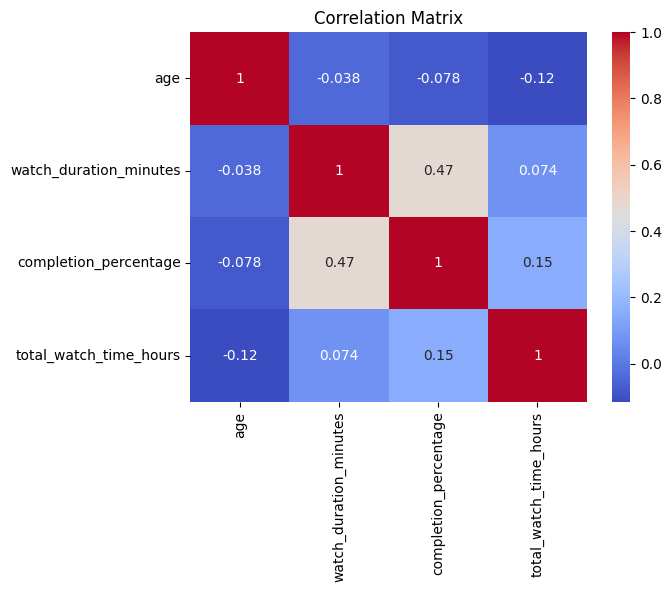

In [12]:
# Merge sessions with users for richer analysis
merged = sessions.merge(users, on='user_id', how='left')
corr_matrix = merged[['age','watch_duration_minutes','completion_percentage','total_watch_time_hours']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Clustering (K-means example)

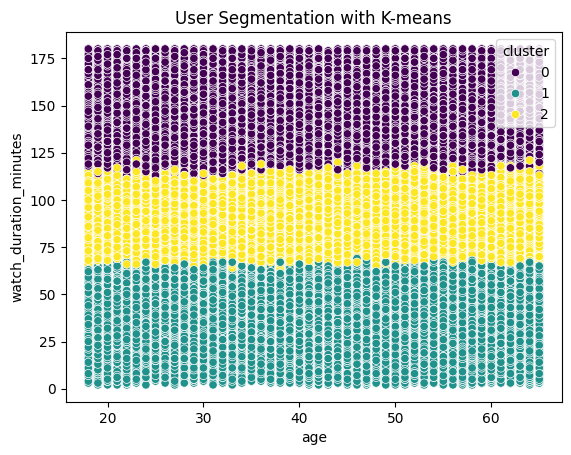

In [13]:
from sklearn.cluster import KMeans

X = merged[['age','watch_duration_minutes','completion_percentage']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
merged['cluster'] = kmeans.fit_predict(X)
sns.scatterplot(data=merged, x='age', y='watch_duration_minutes', hue='cluster', palette='viridis')
plt.title('User Segmentation with K-means')
plt.show()

### Regression: Predict user retention

In [14]:
from sklearn.linear_model import LinearRegression

X = merged[['age','watch_duration_minutes','completion_percentage']].fillna(0)
y = merged['total_watch_time_hours'].fillna(0)

model = LinearRegression()
model.fit(X, y)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-1.72650048  0.00846067  1.57089961]
Intercept: 300.27944583964995


### Time Series Analysis

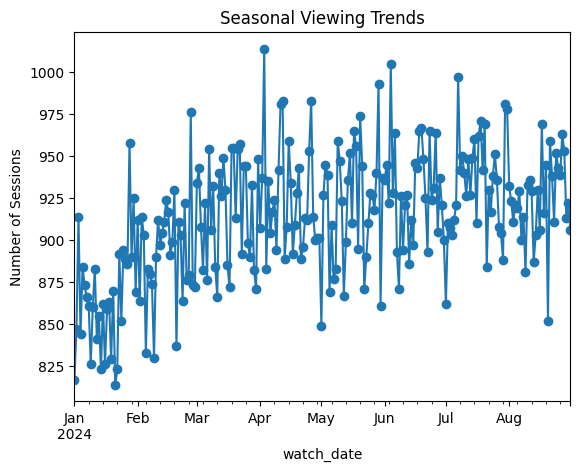

In [15]:
sessions['watch_date'] = pd.to_datetime(sessions['watch_date'])
time_series = sessions.groupby('watch_date').size()
time_series.plot(kind='line', marker='o')
plt.title('Seasonal Viewing Trends')
plt.ylabel('Number of Sessions')
plt.show()